# Template Notebook

## Setup

### Standard library imports

In [1]:
%load_ext autoreload

In [2]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

### Standard library imports

### Thrid Party libraries imports

In [3]:
import numpy as np
from matplotlib import pyplot as plt

### Modules imports

In [4]:
%autoreload 2

### Paths

In [5]:
def task_distribution(x):
    if x < 0:
        return 0

    if x < 300:
        return 3
    
    if x < 600:
        return 1

    if x < 900:
        return 2

In [6]:
def task_accpetance(x, y):
    if x < 300:
        return True if y < 3 else False
    
    if x < 600 and x > 300:
        return True if y < 1 else False

    if x < 900 and x > 600:
        return True if y < 2 else False

In [7]:
t = np.linspace(0, 900, 10_000)
dist = np.array([task_distribution(point) for point in t])

In [8]:
def rejection_sampler(distribution, acceptance):
    while True:
        x_sample = 900 * np.random.rand()
        y_sample = 10 * np.random.rand()
        if acceptance(x_sample, y_sample):
            return x_sample

In [9]:
random_dist = [rejection_sampler(task_distribution, task_accpetance) for _ in range(100_000)]

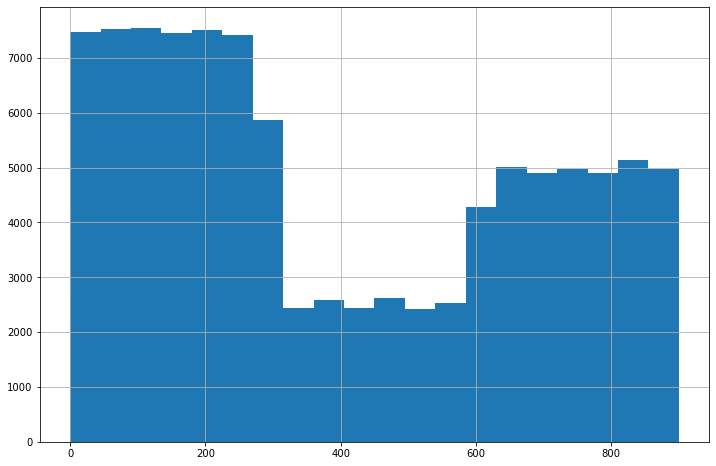

In [10]:
figure = plt.figure(figsize=[12, 8])

plt.hist(random_dist, bins=20)

plt.grid()